In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
data_test = pd.read_csv("../../data/interim/fashion_mnist/fashion-mnist_test.csv")
data_train = pd.read_csv("../../data/interim/fashion_mnist/fashion-mnist_train.csv")

data = pd.concat([data_train, data_test], ignore_index=True)

# Extract labels and pixel data
labels = data['label']
pixels = data.drop(columns=['label'])



In [4]:
# Normalize pixel values
pixels = pixels / 255.0

# shuffle data
np.random.seed(42)
idx = np.random.permutation(len(pixels))
pixels = pixels.iloc[idx]
labels = labels.iloc[idx]

# test train val 20 70 10
X_train = pixels.iloc[:int(0.7*len(pixels))]
y_train = labels.iloc[:int(0.7*len(pixels))]
X_test = pixels.iloc[int(0.7*len(pixels)):int(0.9*len(pixels))]
y_test = labels.iloc[int(0.7*len(pixels)):int(0.9*len(pixels))]
X_val = pixels.iloc[int(0.9*len(pixels)):]
y_val = labels.iloc[int(0.9*len(pixels)):]

# reshape to 28x28
X_train = X_train.values.reshape(-1, 1, 28, 28)
X_test = X_test.values.reshape(-1, 1, 28, 28)
X_val = X_val.values.reshape(-1, 1, 28, 28)

print(X_train.shape)

(49000, 1, 28, 28)


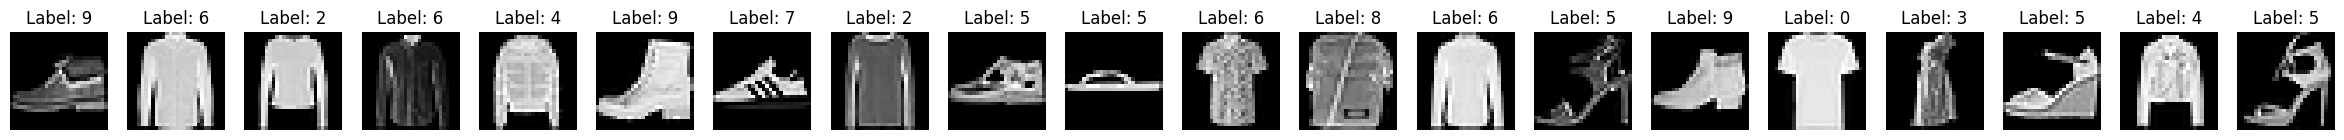

In [5]:
# Number of images to display
num_images = 20

# Create a grid of subplots
plt.figure(figsize=(30, 20))
for i in range(num_images):
    # Select a random image and label
    index = np.random.randint(0, X_train.shape[0])
    image = X_train[index].reshape(28, 28)  # Reshape to 28x28
    label = y_train.iloc[index]  # Get the label

    # Plot each image in a subplot
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {label}")

plt.show()


In [6]:
import torch
import torch.nn as nn

class CnnAutoencoder(nn.Module):
    def __init__(self):
        super(CnnAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            # Input: 1x28x28
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),  # 16x28x28
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 16x14x14
            
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),  # 8x14x14
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 8x7x7
            
            nn.Conv2d(8, 4, kernel_size=3, stride=1, padding=1),  # 4x7x7
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            # Input: 4x7x7
            nn.ConvTranspose2d(4, 8, kernel_size=3, stride=2, padding=1, output_padding=1),  # 8x14x14
            nn.ReLU(),
            
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 16x28x28
            nn.ReLU(),
            
            nn.Conv2d(16, 1, kernel_size=3, stride=1, padding=1),  # 1x28x28
            nn.Sigmoid()  # Output values between 0 and 1 since input is normalized
        )
    
    def encode(self, x):
        """
        Reduces the spatial dimensions of the input image
        Args:
            x: Input tensor of shape [batch_size, 1, 28, 28]
        Returns:
            Encoded representation of shape [batch_size, 4, 7, 7]
        """
        return self.encoder(x)
    
    def decode(self, z):
        """
        Reconstructs the image from the latent space representation
        Args:
            z: Latent space tensor of shape [batch_size, 4, 7, 7]
        Returns:
            Reconstructed image of shape [batch_size, 1, 28, 28]
        """
        return self.decoder(z)
    
    def forward(self, x):
        """
        Forward pass through the autoencoder
        Args:
            x: Input tensor of shape [batch_size, 1, 28, 28]
        Returns:
            Reconstructed image of shape [batch_size, 1, 28, 28]
        """
        z = self.encode(x)
        return self.decode(z)

/home/pratyush/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Training on cuda

Epoch 1/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 318.04it/s]


Train Loss: 0.032899, Validation Loss: 0.016494

Epoch 2/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1241.82it/s]


Train Loss: 0.014545, Validation Loss: 0.012800

Epoch 3/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1303.25it/s]


Train Loss: 0.011941, Validation Loss: 0.011134

Epoch 4/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1389.94it/s]


Train Loss: 0.010763, Validation Loss: 0.010327

Epoch 5/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1253.72it/s]


Train Loss: 0.010124, Validation Loss: 0.009794


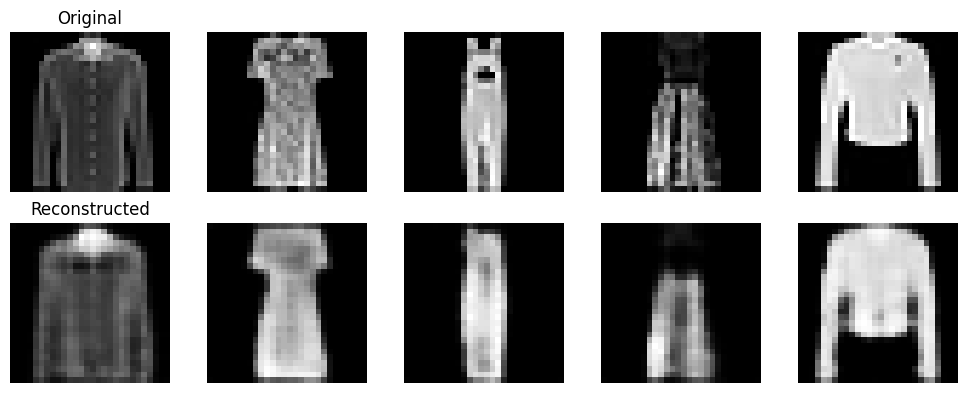


Epoch 6/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1316.48it/s]


Train Loss: 0.009508, Validation Loss: 0.009085

Epoch 7/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1150.68it/s]


Train Loss: 0.008911, Validation Loss: 0.008710

Epoch 8/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1321.32it/s]


Train Loss: 0.008506, Validation Loss: 0.008337

Epoch 9/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1374.09it/s]


Train Loss: 0.008212, Validation Loss: 0.008009

Epoch 10/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1205.78it/s]


Train Loss: 0.007997, Validation Loss: 0.007852


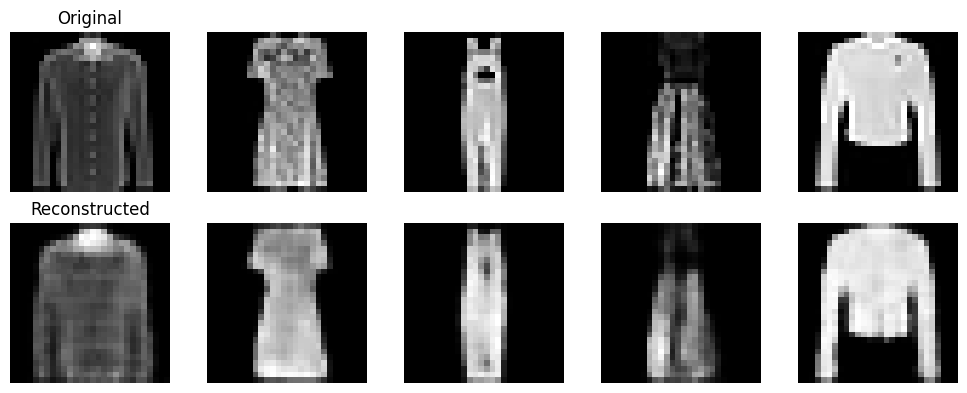


Epoch 11/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1294.82it/s]


Train Loss: 0.007830, Validation Loss: 0.007691

Epoch 12/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1377.21it/s]


Train Loss: 0.007688, Validation Loss: 0.007585

Epoch 13/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1310.59it/s]


Train Loss: 0.007569, Validation Loss: 0.007444

Epoch 14/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1309.41it/s]


Train Loss: 0.007459, Validation Loss: 0.007350

Epoch 15/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1322.25it/s]


Train Loss: 0.007368, Validation Loss: 0.007284


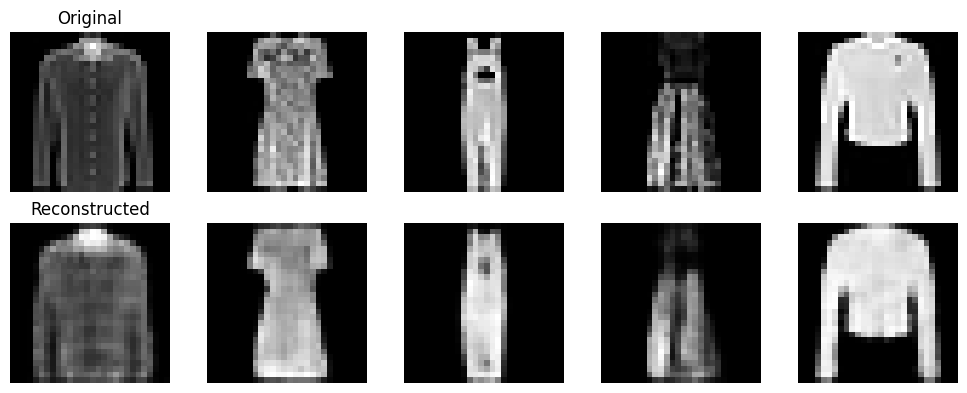


Epoch 16/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1273.04it/s]


Train Loss: 0.007276, Validation Loss: 0.007232

Epoch 17/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1190.82it/s]


Train Loss: 0.007204, Validation Loss: 0.007182

Epoch 18/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 1327.02it/s]


Train Loss: 0.007130, Validation Loss: 0.007055

Epoch 19/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 320.69it/s]


Train Loss: 0.007070, Validation Loss: 0.006995

Epoch 20/20


Validation: 100%|██████████| 110/110 [00:00<00:00, 664.88it/s]


Train Loss: 0.007007, Validation Loss: 0.006981


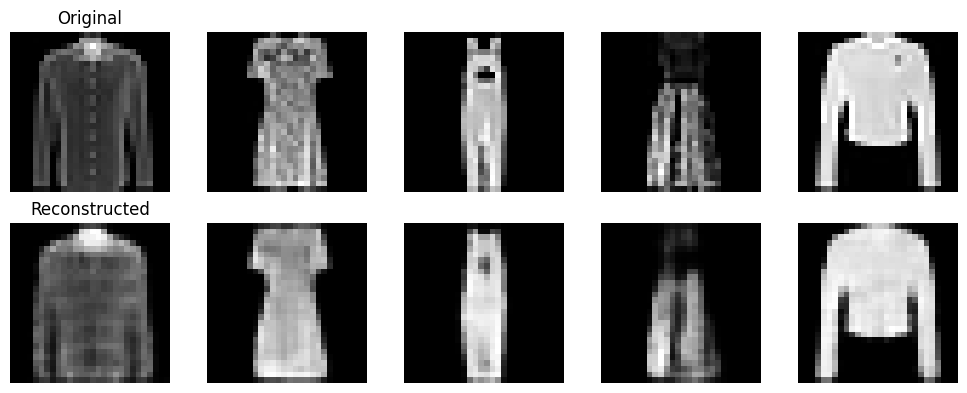

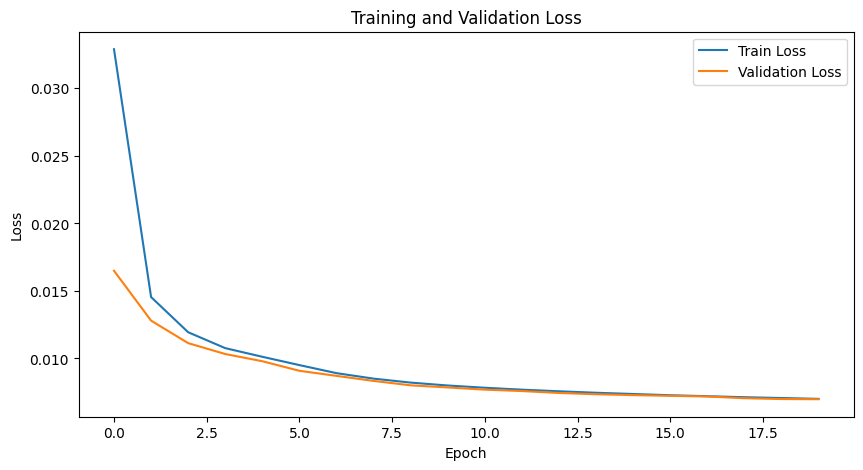

Validation: 100%|██████████| 219/219 [00:00<00:00, 631.66it/s]



Final Test Loss: 0.007095

Final Reconstructions:


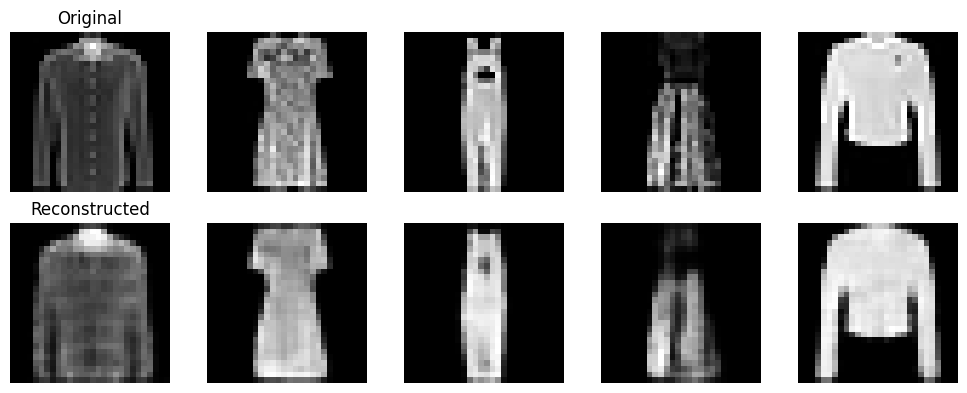

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
X_val_tensor = torch.FloatTensor(X_val)

# Create datasets
train_dataset = TensorDataset(X_train_tensor)
test_dataset = TensorDataset(X_test_tensor)
val_dataset = TensorDataset(X_val_tensor)

# Create dataloaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CnnAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc="Training"):
        x = batch[0].to(device)
        
        # Forward pass
        output = model(x)
        loss = criterion(output, x)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(train_loader)

# Validation function
def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            x = batch[0].to(device)
            output = model(x)
            loss = criterion(output, x)
            total_loss += loss.item()
    
    return total_loss / len(val_loader)

# Function to visualize results
def visualize_reconstruction(model, data_loader, device, num_images=5):
    model.eval()
    with torch.no_grad():
        # Get a batch of images
        images = next(iter(data_loader))[0][:num_images].to(device)
        # Reconstruct images
        reconstructed = model(images)
        
        # Convert to numpy for plotting
        images = images.cpu().numpy()
        reconstructed = reconstructed.cpu().numpy()
        
        # Plot
        fig, axes = plt.subplots(2, num_images, figsize=(2*num_images, 4))
        for i in range(num_images):
            # Original images
            axes[0, i].imshow(images[i][0], cmap='gray')
            axes[0, i].axis('off')
            if i == 0:
                axes[0, i].set_title('Original')
            
            # Reconstructed images
            axes[1, i].imshow(reconstructed[i][0], cmap='gray')
            axes[1, i].axis('off')
            if i == 0:
                axes[1, i].set_title('Reconstructed')
        
        plt.tight_layout()
        plt.show()

# Training loop
num_epochs = 20
train_losses = []
val_losses = []

print(f"Training on {device}")

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    
    # Train
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    
    # Validate
    val_loss = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    
    print(f"Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")
    
    # Visualize reconstructions every 5 epochs
    if (epoch + 1) % 5 == 0:
        visualize_reconstruction(model, test_loader, device)

# Plot training curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Final test evaluation
test_loss = validate(model, test_loader, criterion, device)
print(f"\nFinal Test Loss: {test_loss:.6f}")

# Visualize final results
print("\nFinal Reconstructions:")
visualize_reconstruction(model, test_loader, device)

In [10]:
# save the model
torch.save(model, "cnn_autoencoder_fashion_mnist_0.pth")

Visualizing Original vs Reconstructed Images:


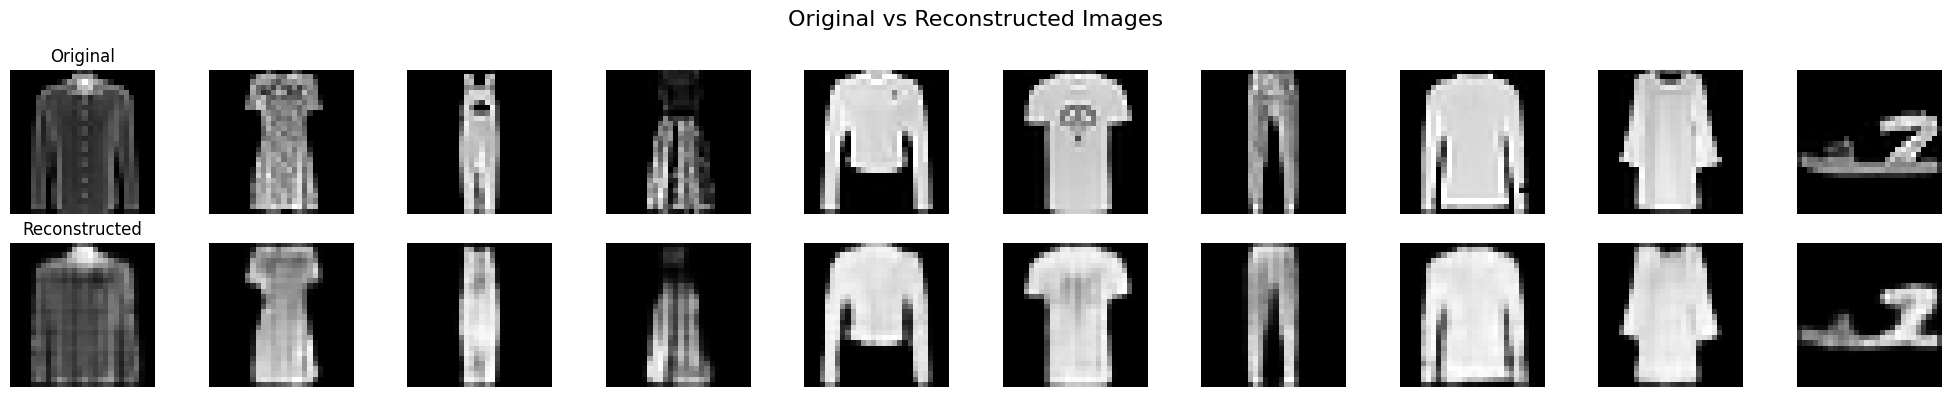


Analyzing Latent Space:


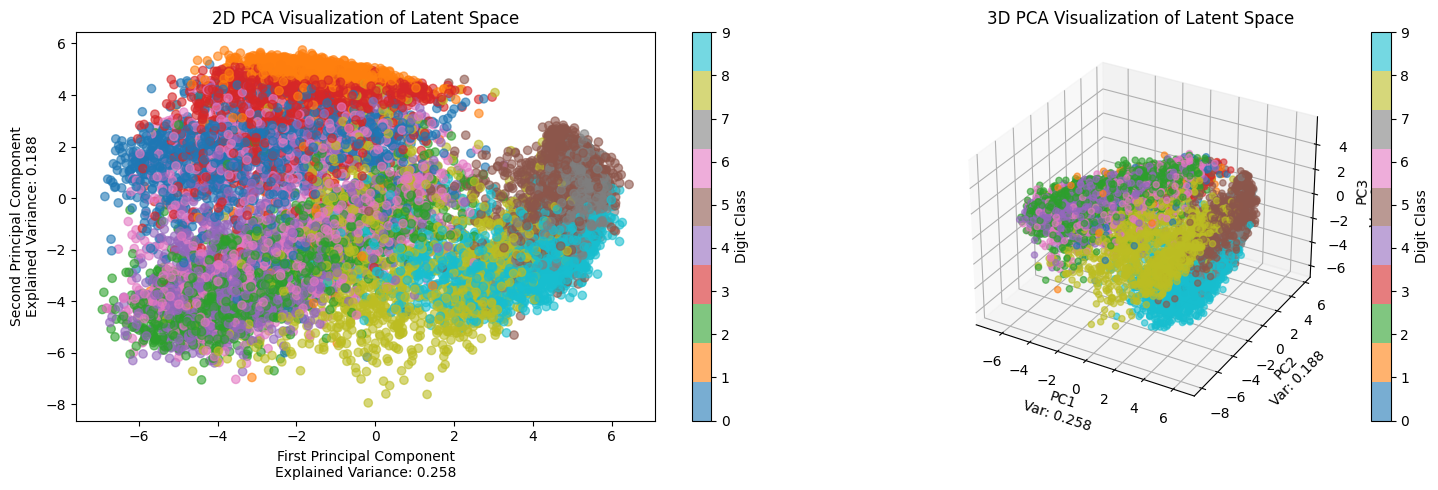


Explained Variance Ratios:
Principal Component 1: 0.258
Principal Component 2: 0.188
Principal Component 3: 0.071
Total Explained Variance (3 components): 0.517

Analyzing Cluster Separation:


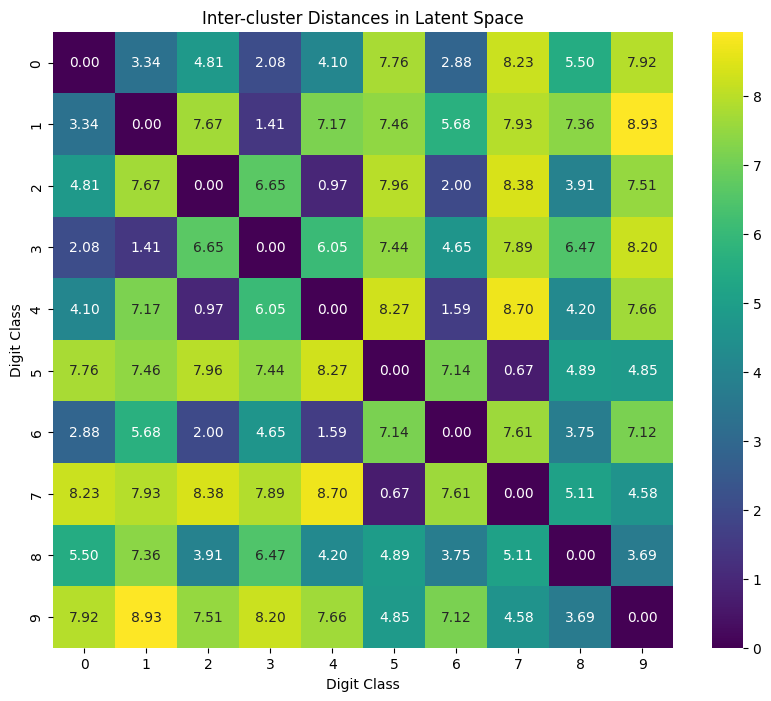

In [9]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def visualize_reconstructions(model, test_loader, device, num_images=10):
    """Visualize original and reconstructed images"""
    model.eval()
    with torch.no_grad():
        # Get a batch of images
        images = next(iter(test_loader))[0][:num_images].to(device)
        # Reconstruct images
        reconstructed = model(images)
        
        # Convert to numpy for plotting
        images = images.cpu().numpy()
        reconstructed = reconstructed.cpu().numpy()
        
        # Create figure with gridspec
        fig = plt.figure(figsize=(20, 4))
        
        # Plot original images
        for i in range(num_images):
            ax = plt.subplot(2, num_images, i + 1)
            plt.imshow(images[i][0], cmap='gray')
            plt.title('Original' if i == 0 else '')
            plt.axis('off')
        
        # Plot reconstructed images
        for i in range(num_images):
            ax = plt.subplot(2, num_images, num_images + i + 1)
            plt.imshow(reconstructed[i][0], cmap='gray')
            plt.title('Reconstructed' if i == 0 else '')
            plt.axis('off')
        
        plt.suptitle('Original vs Reconstructed Images', fontsize=16)
        plt.tight_layout()
        plt.show()

def get_latent_representations(model, loader, device):
    """Get latent representations and labels for all images"""
    model.eval()
    latent_representations = []
    labels_list = []
    
    with torch.no_grad():
        for batch in loader:
            images = batch[0].to(device)
            # Get encoded representations
            latent = model.encode(images)
            # Flatten the latent representations
            latent_flat = latent.view(latent.size(0), -1)
            latent_representations.append(latent_flat.cpu().numpy())
            
    # Concatenate all batches
    latent_representations = np.concatenate(latent_representations, axis=0)
    return latent_representations

def visualize_latent_space(latent_representations, labels, n_components=3):
    """Create 2D and 3D visualizations of the latent space"""
    # Apply PCA
    pca = PCA(n_components=n_components)
    latent_pca = pca.fit_transform(latent_representations)
    
    # Set up the figure
    fig = plt.figure(figsize=(15, 5))
    
    # 2D Plot
    ax1 = fig.add_subplot(121)
    scatter = ax1.scatter(latent_pca[:, 0], latent_pca[:, 1], c=labels, 
                         cmap='tab10', alpha=0.6)
    ax1.set_title('2D PCA Visualization of Latent Space')
    ax1.set_xlabel(f'First Principal Component\nExplained Variance: {pca.explained_variance_ratio_[0]:.3f}')
    ax1.set_ylabel(f'Second Principal Component\nExplained Variance: {pca.explained_variance_ratio_[1]:.3f}')
    plt.colorbar(scatter, ax=ax1, label='Digit Class')
    
    # 3D Plot
    ax2 = fig.add_subplot(122, projection='3d')
    scatter = ax2.scatter(latent_pca[:, 0], latent_pca[:, 1], latent_pca[:, 2], 
                         c=labels, cmap='tab10', alpha=0.6)
    ax2.set_title('3D PCA Visualization of Latent Space')
    ax2.set_xlabel(f'PC1\nVar: {pca.explained_variance_ratio_[0]:.3f}')
    ax2.set_ylabel(f'PC2\nVar: {pca.explained_variance_ratio_[1]:.3f}')
    ax2.set_zlabel(f'PC3\nVar: {pca.explained_variance_ratio_[2]:.3f}')
    plt.colorbar(scatter, ax=ax2, label='Digit Class')
    
    plt.tight_layout()
    plt.show()
    
    # Print explained variance information
    print("\nExplained Variance Ratios:")
    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print(f"Principal Component {i+1}: {ratio:.3f}")
    print(f"Total Explained Variance (3 components): {sum(pca.explained_variance_ratio_):.3f}")

# 1. Visualize reconstructions
print("Visualizing Original vs Reconstructed Images:")
visualize_reconstructions(model, test_loader, device, num_images=10)

# 2. Get latent representations and visualize latent space
print("\nAnalyzing Latent Space:")
latent_representations = get_latent_representations(model, test_loader, device)
visualize_latent_space(latent_representations, y_test.values, n_components=3)

# Additional analysis of cluster separation
print("\nAnalyzing Cluster Separation:")
pca = PCA(n_components=3)
latent_pca = pca.fit_transform(latent_representations)

# Calculate average distance between clusters
from scipy.spatial.distance import cdist

cluster_centers = np.array([latent_pca[y_test.values == i].mean(axis=0) for i in range(10)])
distances = cdist(cluster_centers, cluster_centers)

plt.figure(figsize=(10, 8))
sns.heatmap(distances, annot=True, fmt='.2f', cmap='viridis')
plt.title('Inter-cluster Distances in Latent Space')
plt.xlabel('Digit Class')
plt.ylabel('Digit Class')
plt.show()


Training with Base Config
Epoch [5/20], Train Loss: 0.009620, Val Loss: 0.009321
Epoch [10/20], Train Loss: 0.008227, Val Loss: 0.008061
Epoch [15/20], Train Loss: 0.007609, Val Loss: 0.007518
Epoch [20/20], Train Loss: 0.007217, Val Loss: 0.007136

Training with Large Kernels
Epoch [5/20], Train Loss: 0.008158, Val Loss: 0.007682
Epoch [10/20], Train Loss: 0.006279, Val Loss: 0.006092
Epoch [15/20], Train Loss: 0.005508, Val Loss: 0.005571
Epoch [20/20], Train Loss: 0.005028, Val Loss: 0.005038

Training with SGD + High LR
Epoch [5/20], Train Loss: 0.118071, Val Loss: 0.117174
Epoch [10/20], Train Loss: 0.117206, Val Loss: 0.116485
Epoch [15/20], Train Loss: 0.117013, Val Loss: 0.116312
Epoch [20/20], Train Loss: 0.116831, Val Loss: 0.116139


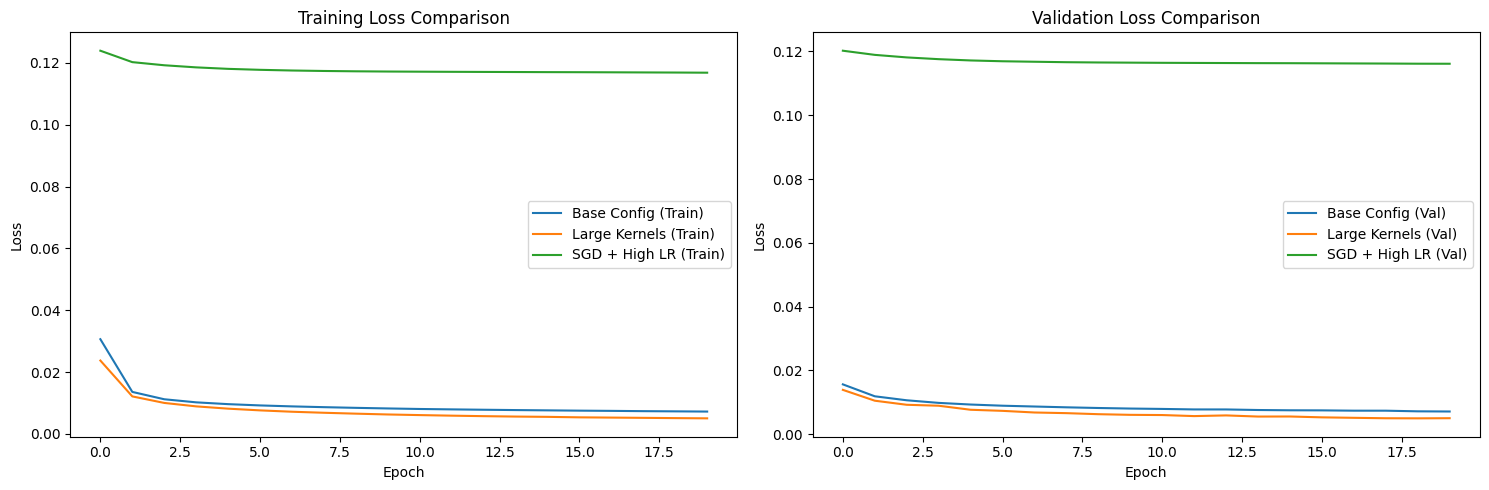


Training with 2 Layers
Epoch [5/20], Train Loss: 0.053437, Val Loss: 0.052810
Epoch [10/20], Train Loss: 0.052880, Val Loss: 0.052337
Epoch [15/20], Train Loss: 0.052696, Val Loss: 0.052164
Epoch [20/20], Train Loss: 0.052617, Val Loss: 0.052098

Training with 3 Layers
Epoch [5/20], Train Loss: 0.010796, Val Loss: 0.010502
Epoch [10/20], Train Loss: 0.009660, Val Loss: 0.009540
Epoch [15/20], Train Loss: 0.009174, Val Loss: 0.009043
Epoch [20/20], Train Loss: 0.008789, Val Loss: 0.008663

Training with 4 Layers


/home/pratyush/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1, 28, 28])) that is different to the input size (torch.Size([64, 1, 24, 24])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (24) must match the size of tensor b (28) at non-singleton dimension 3

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import defaultdict

class CnnAutoencoderConfig(nn.Module):
    def __init__(self, kernel_size=3, n_filters=[16, 8, 4], n_layers=3):
        super(CnnAutoencoderConfig, self).__init__()
        
        # Build encoder layers dynamically
        encoder_layers = []
        in_channels = 1
        current_size = 28
        
        for i in range(n_layers):
            encoder_layers.extend([
                nn.Conv2d(in_channels, n_filters[i], kernel_size=kernel_size, 
                         stride=1, padding=kernel_size//2),
                nn.ReLU(),
                nn.MaxPool2d(2, 2) if i < n_layers-1 else nn.Identity()
            ])
            in_channels = n_filters[i]
            current_size = current_size // 2 if i < n_layers-1 else current_size
        
        self.encoder = nn.Sequential(*encoder_layers)
        
        # Build decoder layers dynamically
        decoder_layers = []
        for i in range(n_layers-1, -1, -1):
            out_channels = n_filters[i-1] if i > 0 else 1
            if i < n_layers-1:
                decoder_layers.extend([
                    nn.ConvTranspose2d(n_filters[i], out_channels,
                                     kernel_size=kernel_size, stride=2,
                                     padding=kernel_size//2, output_padding=1),
                    nn.ReLU()
                ])
            else:
                decoder_layers.extend([
                    nn.Conv2d(n_filters[i], out_channels, 
                             kernel_size=kernel_size, stride=1, 
                             padding=kernel_size//2),
                    nn.Sigmoid()
                ])
                
        self.decoder = nn.Sequential(*decoder_layers)
    
    def encode(self, x):
        return self.encoder(x)
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)

def train_and_validate(model, train_loader, val_loader, optimizer, criterion, 
                      device, num_epochs=20):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        for batch in train_loader:
            x = batch[0].to(device)
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, x)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                x = batch[0].to(device)
                output = model(x)
                loss = criterion(output, x)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {train_losses[-1]:.6f}, '
                  f'Val Loss: {val_losses[-1]:.6f}')
            
    return train_losses, val_losses

# 1. Hyperparameter combinations
configs = [
    {
        'name': 'Base Config',
        'kernel_size': 3,
        'n_filters': [16, 8, 4],
        'learning_rate': 0.001,
        'optimizer': 'adam'
    },
    {
        'name': 'Large Kernels',
        'kernel_size': 5,
        'n_filters': [32, 16, 8],
        'learning_rate': 0.001,
        'optimizer': 'adam'
    },
    {
        'name': 'SGD + High LR',
        'kernel_size': 3,
        'n_filters': [16, 8, 4],
        'learning_rate': 0.01,
        'optimizer': 'sgd'
    }
]

# Train models with different hyperparameters
results = defaultdict(dict)

for config in configs:
    print(f"\nTraining with {config['name']}")
    
    # Initialize model
    model = CnnAutoencoderConfig(
        kernel_size=config['kernel_size'],
        n_filters=config['n_filters']
    ).to(device)
    
    # Setup optimizer
    if config['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])
    else:
        optimizer = optim.SGD(model.parameters(), lr=config['learning_rate'])
    
    # Train model
    train_losses, val_losses = train_and_validate(
        model, train_loader, val_loader, optimizer, 
        nn.MSELoss(), device
    )
    
    results[config['name']]['train_losses'] = train_losses
    results[config['name']]['val_losses'] = val_losses

# Plot results
plt.figure(figsize=(15, 5))

# Training loss comparison
plt.subplot(1, 2, 1)
for config_name in results:
    plt.plot(results[config_name]['train_losses'], label=f'{config_name} (Train)')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Validation loss comparison
plt.subplot(1, 2, 2)
for config_name in results:
    plt.plot(results[config_name]['val_losses'], label=f'{config_name} (Val)')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Training with 2 Layers
Epoch [5/20], Train Loss: 0.052760, Val Loss: 0.052242
Epoch [10/20], Train Loss: 0.001550, Val Loss: 0.001512
Epoch [15/20], Train Loss: 0.001266, Val Loss: 0.001244
Epoch [20/20], Train Loss: 0.001131, Val Loss: 0.001115

Training with 3 Layers
Epoch [5/20], Train Loss: 0.059011, Val Loss: 0.058241
Epoch [10/20], Train Loss: 0.057857, Val Loss: 0.057197
Epoch [15/20], Train Loss: 0.057403, Val Loss: 0.056811
Epoch [20/20], Train Loss: 0.057162, Val Loss: 0.056557


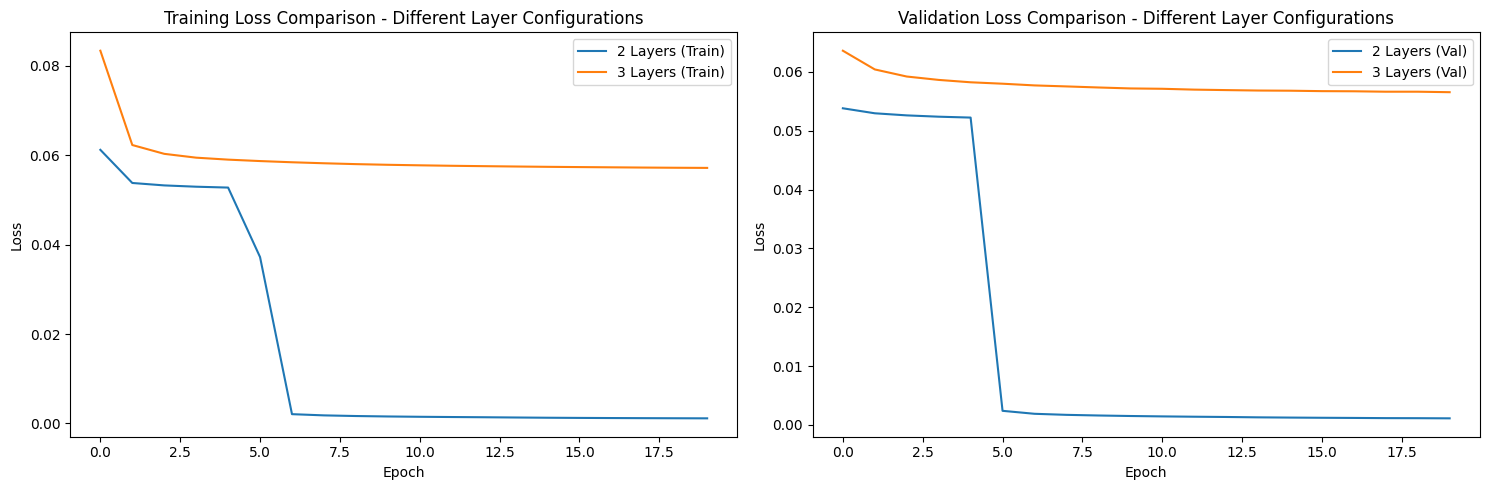


Best performing hyperparameter configuration:
Configuration: Large Kernels
Best validation loss: 0.004994

Best performing layer configuration:
Configuration: 2 Layers
Best validation loss: 0.001115


In [15]:
# 2. Different layer configurations
layer_configs = [
    {'name': '2 Layers', 'n_layers': 2, 'n_filters': [16, 8]},
    {'name': '3 Layers', 'n_layers': 3, 'n_filters': [16, 8, 4]},
]

layer_results = defaultdict(dict)

for config in layer_configs:
    print(f"\nTraining with {config['name']}")
    
    model = CnnAutoencoderConfig(
        n_layers=config['n_layers'],
        n_filters=config['n_filters']
    ).to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses, val_losses = train_and_validate(
        model, train_loader, val_loader, optimizer, 
        nn.MSELoss(), device
    )
    
    layer_results[config['name']]['train_losses'] = train_losses
    layer_results[config['name']]['val_losses'] = val_losses

# Plot layer configuration results
plt.figure(figsize=(15, 5))

# Training loss comparison
plt.subplot(1, 2, 1)
for config_name in layer_results:
    plt.plot(layer_results[config_name]['train_losses'], 
             label=f'{config_name} (Train)')
plt.title('Training Loss Comparison - Different Layer Configurations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Validation loss comparison
plt.subplot(1, 2, 2)
for config_name in layer_results:
    plt.plot(layer_results[config_name]['val_losses'], 
             label=f'{config_name} (Val)')
plt.title('Validation Loss Comparison - Different Layer Configurations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Find best performing model
best_config = min(results.items(), 
                 key=lambda x: min(x[1]['val_losses']))
print("\nBest performing hyperparameter configuration:")
print(f"Configuration: {best_config[0]}")
print(f"Best validation loss: {min(best_config[1]['val_losses']):.6f}")

best_layer = min(layer_results.items(), 
                key=lambda x: min(x[1]['val_losses']))
print("\nBest performing layer configuration:")
print(f"Configuration: {best_layer[0]}")
print(f"Best validation loss: {min(best_layer[1]['val_losses']):.6f}")


In [1]:
# save the model
torch.save(model, "./fashion_mnist_autoencoder.pth")

NameError: name 'torch' is not defined

In [20]:
# load the model and test
model = torch.load("./fashion_mnist_autoencoder.pth")
model.eval()
test_loss = validate(model, test_loader, criterion, device)
print(f"\nFinal Test Loss: {test_loss:.6f}")

Validation:   0%|          | 0/219 [00:00<?, ?it/s]

Validation: 100%|██████████| 219/219 [00:00<00:00, 615.84it/s]


Final Test Loss: 0.057048


In [19]:
# save the train loss as csv
pd.DataFrame(layer_results[config_name]['train_losses']).to_csv('cnnautoencoder_train_loss.csv', index=False)
pd.DataFrame(layer_results[config_name]['val_losses']).to_csv('cnnautoencoder_val_loss.csv', index=False)